# Binary classification test

In [1]:
#pip install scikit-learn

In [2]:
#pip install seaborn

In [3]:
#pip install matplotlip

In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import seaborn as sns

## Introduction

Binary predictors are a key tool in classification problems. These predictors are central to a variety of applications, from disease diagnosis to financial forecasting. In this computer lab, we will attempt to assess the quality of a set of binary predictors on balanced and unbalanced datasets using the quality estimators and metrics we defined in the previous class.

## Experimental setup

We will create an artificial dataset with two clusters in high dimensions. We will assign a label 0 and 1 to each of these clusters and the goal is to evaluate the performance of different predictors to classify which entry belongs to each cluster. In the lab, we will firstly evaluate the quality of the predictions and secondly fine tune the parameters to optimize the performance of each predictor. In the end, we will decide which predictor is the best of all.

We plan to study the following predictors:

#### 1. Random assignment

- **Strategy:** Randomly assign label 1 based on a predefined probability \( p \).
- **Parameter to Tune:** The probability \( p \) of choosing label 1.

#### 2. PCA-based predictor

- **Strategy:** Use principal component analysis (PCA) to assign label 1 based on the first principal component (PC1).
- **Parameter to Tune:** The threshold \( a \) so that label 1 is selected when PC1 < \( a \).

#### 3. Logistic Regression

- **Strategy:** Implement logistic regression to estimate the probability that a given entry belongs to label 1.
- **Tuning parameter:** The threshold for determining the label based on the estimated probability.

---

## Next steps:

1. Define our data set
2. Define the different predictors
3. Define the various quality metrics discussed in the previous class.
4. Evaluate each predictor and optimize the parameters



## 1. Generation of our dataset

We generate 2 random clusters for a binary test classification

1) Parameters of make_classification:

n_features: 
This parameter specifies the number of features (also known as input variables or attributes) in the synthetic dataset. In this case, there are 20 features.

n_samples:
It determines the total number of data samples or instances in the dataset. Here, there are 1 ,000 data sample.s

n_classes
 This parameter specifies the number of classes in the classification problem. In your code, it's set to 2, indicating a binary classification problem, meaning there are two classes (typically labeled as 0a nd 1.)

eeiht
:s This parameter allows you to control the class distribution in the generated dataset. It is a list containing the probability of each class occurring in the dataset. theour code, Prob_true and 1 - Prob_true are used as probabilities for the two classes. These probabilities determine the class imbalance in the dataseIn our caseple, if Prob_true is set to 0.7, it means that approximately 70% of the samples will belong to class 1 (1 - Prob_true), and the remaining 30% will belong to class 0 (Pob_true).u.rand**om_ate:s: This parameter sets the seed for the random number generator. Setting this seed ensures that the data generated is reproducible, meaning that running the code with the same seed will produce the same dataset each time. It's useful for debugging and ensuring consistent relt.
2
)*Parameters of train_test_spli*:

This function is commonly used to split a dataset into two subsets: one for training machine learning models and the other for testing their performance. It randomly shuffles the data and assigns a portion of it to the training set and the remaining portion to the test set.

X and y: These are the feature matrix (input data) and labels (target output) that we generated earlier using the make_classification function. 
X contains the features of your dataset, and y contains the corresponding class labels.

test_size: This parameter specifies the proportion of the dataset that should be allocated to the test set. In this case, it's set to 0.5, meaning that 50% of the data will be used for testing, and the other 50% will be used for training.

random_state: Similar to the random_state parameter in the make_classification function, this parameter sets the seed for the random number generator when splitting the data. Setting a random seed ensures that the data split remains consistent across different runs of the code, making your results reproducible.

After running this code, we have four new variables:

X_train: This will contain a subset of your feature matrix X, which you can use for training your machine learning model.
X_test: This will contain the remaining portion of your feature matrix X, which you can use to evaluate the performance of your trained model.
y_train: This will contain a subset of your labels y, corresponding to the training data.
y_test: This will contain the remaining portion of your labels y, corresponding to the test data.

You can use X_train and y_train to train your machine learning model and then evaluate its performance on the test data using X_test and y_test.
This split allows you to assess how well your model generalizes to new, unseen dats.



We only pick the first and second feature from each variable (dimensional reduction) to project the data along the 2 most important directions from the data:


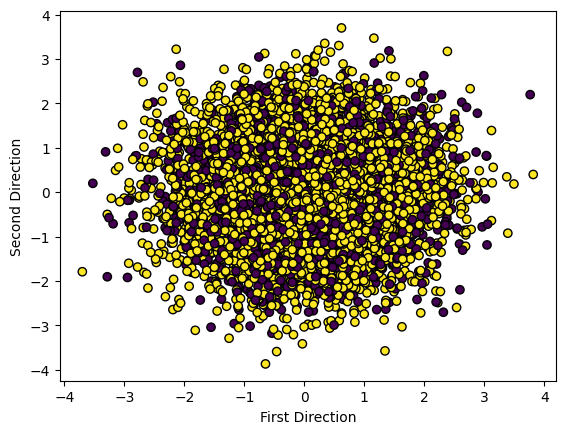

In [5]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Setting the probability for the true class
Prob_true = 0.7

# Generating the n_samples in 20 dimensions belonging to 2 categories  
X, y = make_classification(n_features=20,
                           n_samples=10000, 
                           n_classes=2,
                           #n_clusters_per_class=1,class_sep=1.5,
                           weights=[1-Prob_true,Prob_true],
                           random_state=0)

#print("Variable of generated data X:\n\n", X)

#print("\n", "Generated data X information (Variables, Dimension of variables):",X.shape)

#print("\n", "Labels of generated data:", y)

#print("\n", "Labels dimensions:", y.shape)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

#print("\n")
#print("Length X_train:", len(X_train))
#print("Length X_test:", len(X_test))
#print("\n")
#print("X_train:", X_train)
#print("\n")
#print("X_test:", X_test)
#print("\n")
#print("Length y_train:", len(y_train))
#print("Length y_test:", len(y_test))
#print("\n")
#print("y_train:", y_train)
#print("y_test:", y_test)
#print("\n")

print("We only pick the first and second feature from each variable (dimensional reduction) to project the data along the 2 most important directions from the data:")

# Plotting the generated data

# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolors='k')

# Adding labels to the axes
plt.xlabel('First Direction')
plt.ylabel('Second Direction')

# Display the plot
plt.show()



We can check that there are two clases of data-points using dimensional reduction, for instance the PCA (we will study its meaning later on in the course)

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting
information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve
the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

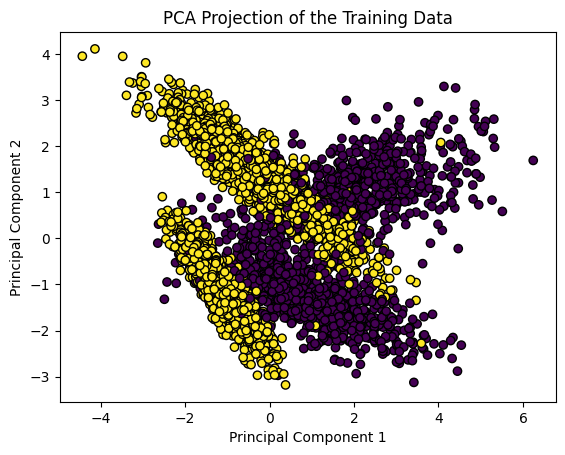

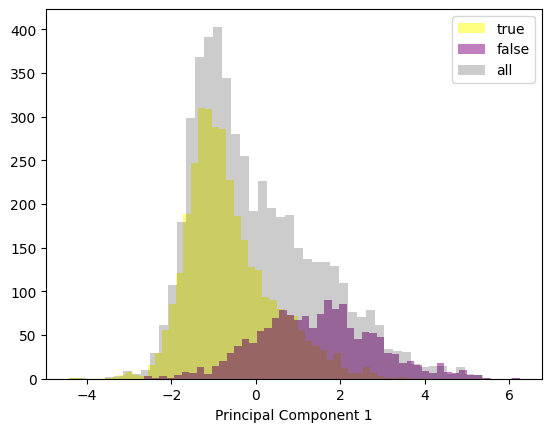

In [6]:
from sklearn.decomposition import PCA

# Projection of our data in 2D
pca = PCA(n_components=2)

# Training + Dimension reduction to 2D
X_train_pca = pca.fit_transform(X_train)



# Representation of the data after having applied the PCA (based on the 2 principal components)

# Plotting the training data in the new PCA space
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], marker='o', c=y_train, edgecolors='k')
plt.title('PCA Projection of the Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


index_1=(y_train==1)
index_0=(y_train==0)


plt.hist(X_train_pca[index_1, 0],bins=50,color='yellow',alpha=0.5,label='true')
plt.hist(X_train_pca[index_0, 0],bins=50,color='purple',alpha=0.5,label='false')
plt.hist(X_train_pca[:, 0],bins=50,color='black',alpha=0.2,label='all')
plt.legend()
plt.xlabel('Principal Component 1')
plt.show()



## 2. Define different predictors

We need to define our 3 different predictors.

### PREDICTOR 1: No skills

I want a predictor that just assigns 1 with a random probability $p$

In [7]:
import random

"Expected input of X_train (in this case, the size, instead of 5000 is 20)"
#a = np.array([ 0.83035958, -0.33025241, -0.23054277, -0.46191112,  0.42304301,  1.19815019, -0.59851063, 0.56008388, 1.17255537, 0.45665398, -0.08517492, 0.12084453, -0.51434822, 0.02847425, 1.43269973, -0.6677283, 0.30813234, -1.02979077, 1.73386698, -0.59929727])
"Expected output from the predictor"
#b = np.random.choice([0,1], size=20, p = [0.8, 0.2])

#print(a)
#print(b)



def no_skills(X, p=0.5):
    "Method_1: Built-in function in Numpy"
    random_pred_vect = np.array(np.random.choice([0,1], size=len(X), p = [1-p, p]))
    return random_pred_vect
"""
def no_skills_2(X, p=0.5):
    "Method_2: Comprehension list"
    return np.array([1 if random.random() < p else 0 for x in range(X.shape[0])])
"""

'\ndef no_skills_2(X, p=0.5):\n    "Method_2: Comprehension list"\n    return np.array([1 if random.random() < p else 0 for x in range(X.shape[0])])\n'

### PREDICTOR 2: PCA Based Predictor

In [8]:
def PCA_based(X,threshold):
    pca = PCA(n_components=1)
    X_pca = pca.fit_transform(X).reshape(len(X))

    # X_pca < threshold creates an array of booleans depending on the chosen threshold.
    # The function astype(int) turns True into 1 and False into 0.
    return (X_pca<threshold).astype(int)


#print("PCA_based labels:", PCA_based(X_test, 0))
#print("True Labels:", y_test)

### PREDICTOR 3: Logistic regression

We can learn to classify this data using logistic regression. I include a discussion about its training but we do not need this for this lab.

Let us describe the data in terms of a probability function
$$p_{A,B}(\boldsymbol{x})=\frac{1}{1+e^{-(A+\boldsymbol{B}\cdot\boldsymbol{x})}},$$ using labeled data $(\boldsymbol{x}_k,y_k)$. We want to train the model such that the probability $p_k=p_{A,B}(\boldsymbol{x}_k)=1$ for $y_k=1$ and 0 for $y_k=0$. For this purpose, we can define a log loss
$$L=-\sum_{k} y_k\log p_k -(1-y_k)\log p_k $$
(it is clear that $L$ is minimized $p_k=1$ when $y_k=1$ and $p_k=0$ when $y_k=0$).
One can then minimize it by calculating the gradient
$$\frac{\partial L}{\partial A}=\sum_k (p_k-y_k)=0$$
$$\frac{\partial L}{\partial \boldsymbol{B}}=\sum_k \boldsymbol{x}_k (p_k-y_k)=0$$
Which is solved numerically. As a result of this process, we obtain a way to assign to each data point a probability of being in the category $y=1$. 

The result we obtained is a two-dimensional matrix containing the probabilities of belonging to each of the two classes (0 and 1) for each example in the test set X_test. 

The matrix has the following structure:
    1) Each row of the matrix represents an example (a sample) from the test set X_test.
    
    2) There are two columns in each row. The first column represents the probability of the example belonging to class 0, and the second column represents the probability of it belonging to class 1.

For example, let's take the first row of the result matrix:

    [0.50190537 0.49809463]

This means that for the first example in X_test, the logistic regression model estimates a probability of 50.19% of belonging to class 0 (the first column) and a probability of 49.81% of belonging to class 1 (the second column).

In [9]:
from sklearn.linear_model import LogisticRegression

def logistic(X_test,X_train,y_train):

    clf = LogisticRegression(solver='lbfgs', max_iter=1000)
    clf.fit(X_train, y_train)
    
    y_probs = clf.predict_proba(X_test)

    return y_probs

#print(logistic(X_test, X_train, y_train))

In [10]:
"Now, we have 3 different predictors associating a label to our data."

#print("True labels:", y_test, "\n")
#print("no_skills labels:", no_skills_1(X, p=0.5), "\n")
#print("PCA_based labels:", PCA_based(X_test, 0), "\n")
#print("Logistics Regression labels:", logistic(X_test, X_train, y_train), "\n")
#print("Logistic Regression labels clean:", (logistic(X_test,X_train,y_train)[:,1]>0.5).astype(int))


'Now, we have 3 different predictors associating a label to our data.'

## 3. Confusion matrix

Now we have a set of two pairs mutually incompatible events: 

- **True cluster** being part of cluster $[0,1]$,
- **Predicted label**: getting $[-,+]$


### Confusion matrices

We need to compute the conditional probablities, e.g. $P(1|+)$, or $P(0|+)$.

Define a function that given the number two vectors containing the categories of the samples in the test set, $y$ and $y_{\rm pred}$, it returns the number of true positives (TP, $N(1\cap +)$), true negatives (TN, $N(0\cap -)$), false positives (FP, $N(0\cap +)$)  and false negatives (FN, $N(1\cap -)$)


In [11]:
"""
Input 2 vectors (the prediction -> y_pred and the real values -> y_test) and the function compares them
Example = y_pred = [1,1,0,1,0,0]
          y_test = [0,1,0,0,1,0]
And we can say that the first prediction is a False Positive (FP), second one is a True Positive and so on

"""
def compute_confusion_matrix(y_pred,y_test):
    "Definition of counters for the 4 metrics: TN (True Negative), FP (False Positive), FN (False Negative), TP (True Negative)"
    TN,FP,FN,TP=np.zeros(4)
    
    #print("y_pred:", y_pred, "\n")
    #print("y_test:", y_test)
    
    "Loop to compare and count the real value with the prediction"
    for i, y in enumerate(y_test):
        if y == 1 and y_pred[i] == 1:
            TP = TP + 1
        
        elif y == 1 and y_pred[i] == 0:
            FN = FN + 1
        
        elif y == 0 and y_pred[i] == 0:
            TN = TN + 1
        
        elif y == 0 and y_pred[i] == 1:
            FP = FP + 1
    
    return TN,FP,FN,TP


#print("(TN, FP, FN, TP) depending on the chosen predictor:\n")
#print("Confusion Matrix of No_skills_1:", compute_confusion_matrix(no_skills_1(X_train, p=0.99), y_test))
#print("Confusion Matrix of PCA_based:", compute_confusion_matrix(PCA_based(X_test, 0), y_test))
#print("Confusion Matrix of Logistic Regression:", compute_confusion_matrix((logistic(X_test,X_train,y_train)[:,1]>0.5).astype(int), y_test))


We can visualize the confusion matrix 

<table>
  <tr>
    <th></th>
    <th>Pred -</th>
    <th>Pred +</th>
  </tr>
  <tr>
    <th>Real 0</th>
    <td>TNR </td>
    <td>FPR </td>
  </tr>
  <tr>
    <th>Real 1</th>
    <td>FNR </td>
    <td>TPR</td>
  </tr>
</table>
It is more convenient to divide by the total number of entries to have an idea of the proportions.


for 3 different predictors:
    
- Random guess with $p=0.99$
- PCA threshold 0
- Logistic $p_1>0.5\rightarrow 1$




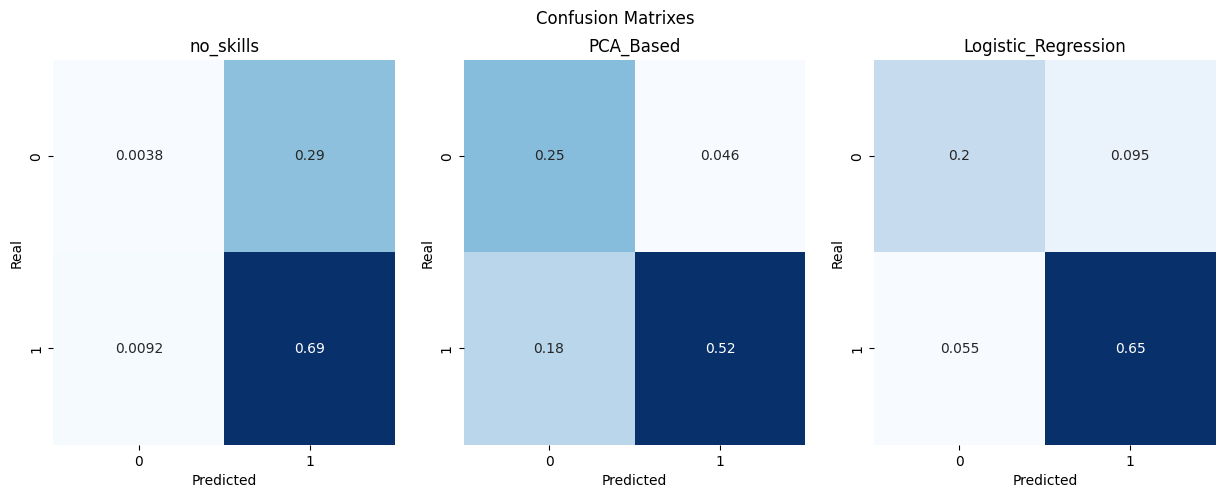

In [12]:

y_pred_no_skills = no_skills(X_test, p=0.99)
y_pred_PCA = PCA_based(X_test, 0)

logistic_regression_matrix = logistic(X_test,X_train,y_train)[:,1] # probability of 1
y_pred_logistic_regression_labels = (logistic_regression_matrix>0.5).astype(int)

titles=["no_skills", "PCA_Based","Logistic_Regression"]

fig, ax = plt.subplots(1, 3, figsize=(15,5))
for i,y_pred in enumerate([y_pred_no_skills, y_pred_PCA, y_pred_logistic_regression_labels]):
    
    TN,FP,FN,TP  = compute_confusion_matrix(y_pred,y_test)
    confusion_matrix = [[TN,FP],[FN,TP]]

    ax[i].set_title(titles[i])
    sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, cmap="Blues", cbar=False,ax=ax[i])
    ax[i].set_xlabel('Predicted')
    ax[i].set_ylabel('Real')
plt.suptitle('Confusion Matrixes')
plt.show()

Which is the confusion matrix if both events were completely independent?

Remember that $P(0\cap +)=\frac{P(0\cap +)}{N_T}=P(0|+)P(+)=P(0)P(+)$

<table>
  <tr>
    <th></th>
    <th>Pred -</th>
    <th>Pred +</th>
  </tr>
  <tr>
    <th>Real 0</th>
    <td>𝑃(0)𝑃(-)</td>
    <td>𝑃(0)𝑃(+)</td>
  </tr>
  <tr>
    <th>Real 1</th>
    <td>𝑃(1)𝑃(-)</td>
    <td>𝑃(1)𝑃(+)</td>
  </tr>
</table>



In [13]:
def compute_randomconfusion_matrix(y_pred, y_test):
    "Calculate values"
    P_1 = np.average(y_test)
    P_0 = 1 - P_1
    P_pos = np.average(y_pred)
    P_neg = 1 - P_pos

    "Compute values of TN, FP, FN, TP by definition in case on independent events"
    TN = P_0*P_neg
    FP = P_0*P_pos
    FN = P_1*P_neg
    TP = P_1*P_pos
    
    return TN,FP,FN,TP

#print("(TN, FP, FN, TP) depending on the chosen predictor:\n")
#print("Confusion Matrix of No_skills_1:", compute_randomconfusion_matrix(no_skills_1(X_train, p=0.99), y_test))
#print("Confusion Matrix of PCA_based:", compute_randomconfusion_matrix(PCA_based(X_test, 0), y_test))
#print("Confusion Matrix of Logistic Regression:", compute_randomconfusion_matrix((logistic(X_test,X_train,y_train)[:,1]>0.5).astype(int), y_test))

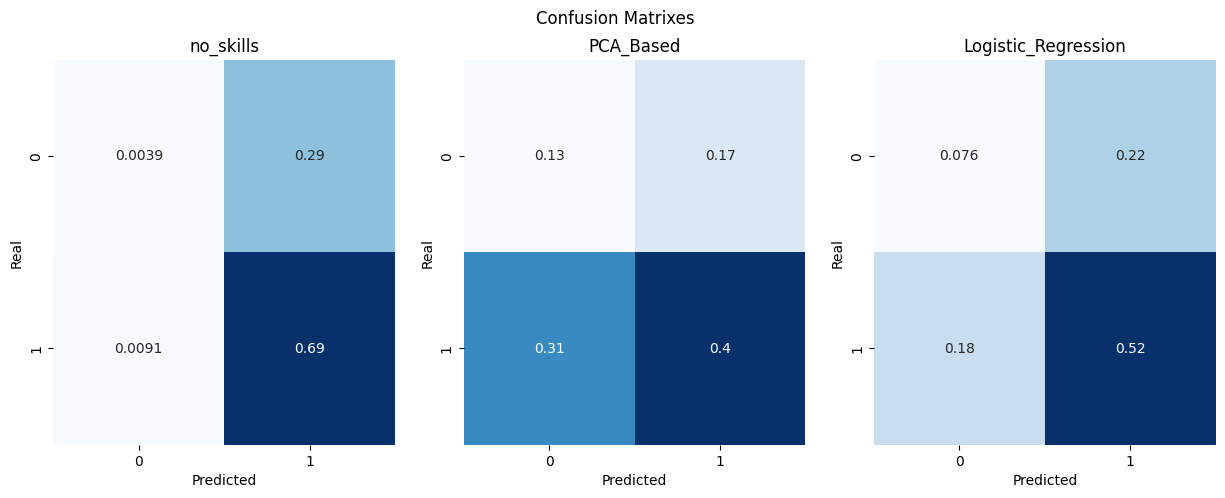

In [14]:
# y_pred_no_skills = no_skills(X_test, p=0.99)
# y_pred_PCA = PCA_based(X_test, 0)

# logistic_regression_matrix = logistic(X_test,X_train,y_train)[:,1] # probability of 1
# y_pred_logistic_regression_labels = (logistic_regression_matrix>0.5).astype(int)

# titles=["no_skills", "PCA_Based","Logistic_Regression"]

fig, ax = plt.subplots(1, 3,figsize=(15,5))
for i,y_pred in enumerate([y_pred_no_skills, y_pred_PCA,y_pred_logistic_regression_labels]):
    
    TN,FP,FN,TP = compute_randomconfusion_matrix(y_pred, y_test)
    random_confusion_matrix = [[TN,FP],[FN,TP]]
    

    ax[i].set_title(titles[i])
    sns.heatmap(random_confusion_matrix, annot=True, cmap="Blues", cbar=False,ax=ax[i])
    ax[i].set_xlabel('Predicted')
    ax[i].set_ylabel('Real')
plt.suptitle('Confusion Matrixes')
plt.show()

## 4. Quality estimators

Write a function to compute the Sensitivity, Specificity, Precisiono, Negative Positive Value, Accuracy and F1 score, given two vectors of predicted and true labels 

In [15]:
def metrics(y_pred, y_test):
    TN, FP, FN, TP  = compute_confusion_matrix(y_pred,y_test)
    #print("TN:", TN, "FP:", FP, "FN:", FN, "TP:", TP)
    
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    precision = TP / (TP + FP)
    negative_predictive_value = TN / (TN + FN)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    F1_score = (2*TP) / (2*TP + FP + FN)
    
    return sensitivity, specificity, precision, negative_predictive_value, accuracy, F1_score

#print(metrics(no_skills_1(X, p=0.5), y_test))

Which is the baseline for these estimators?

In [16]:
def metrics_baseline(y_pred, y_test):
    P_1 = np.average(y_test)
    P_0 = 1 - P_1
    P_pos = np.average(y_pred)
    P_neg = 1 - P_pos
    
    sensitivity_rand = P_pos
    specificity_rand = P_neg
    precision_rand = P_1
    negative_predictive_value_rand = P_0
    accuracy_rand = sensitivity_rand * precision_rand + specificity_rand * negative_predictive_value_rand
    F1_score_rand = (2 * sensitivity_rand * precision_rand) / (sensitivity_rand + precision_rand)
    
    return sensitivity_rand, specificity_rand, precision_rand, negative_predictive_value_rand, accuracy_rand, F1_score_rand

In [17]:

def quality_estimators(y_pred, y_test):
    
    Sen,Spe,Pre,NPV,Acc,F1= metrics(y_pred, y_test)
    Sen_ran,Spe_ran,Pre_ran,NPV_ran,Acc_ran,F1_ran= metrics_baseline(y_pred, y_test)
     
    
    print("**********************")

    print(f"{'Accuracy:':<25} {Acc * 100:.2f}% ({Acc_ran * 100:.2f}%)")
    print(f"{'F1 Score:':<25} {F1 * 100:.2f}% ({F1_ran * 100:.2f}%)")
    print(f"{'Sensitivity (Recall):':<25} {Sen * 100:.2f}% ({Sen_ran * 100:.2f}%)")
    print(f"{'Precision:':<25} {Pre * 100:.2f}% ({Pre_ran * 100:.2f}%)")
    print(f"{'Specificity:':<25} {Spe * 100:.2f}% ({Spe_ran * 100:.2f}%)")
    print(f"{'NPV:':<25} {NPV * 100:.2f}% ({NPV_ran * 100:.2f}%)")

    print("**********************")


In [18]:

for i,y_pred in enumerate([y_pred_no_skills, y_pred_PCA,y_pred_logistic_regression_labels]):
    print(titles[i])
    quality_estimators(y_pred, y_test)
    

no_skills
**********************
Accuracy:                 69.80% (69.81%)
F1 Score:                 82.13% (82.14%)
Sensitivity (Recall):     98.69% (98.70%)
Precision:                70.33% (70.34%)
Specificity:              1.28% (1.30%)
NPV:                      29.23% (29.66%)
**********************
PCA_Based
**********************
Accuracy:                 76.98% (52.68%)
F1 Score:                 81.87% (62.73%)
Sensitivity (Recall):     73.87% (56.60%)
Precision:                91.80% (70.34%)
Specificity:              84.36% (43.40%)
NPV:                      57.65% (29.66%)
**********************
Logistic_Regression
**********************
Accuracy:                 85.00% (59.87%)
F1 Score:                 89.63% (72.25%)
Sensitivity (Recall):     92.12% (74.26%)
Precision:                87.26% (70.34%)
Specificity:              68.11% (25.74%)
NPV:                      78.48% (29.66%)
**********************


## 5. Quality as a function of the parameters

Compute the accuracy of each method as function of the parameters of the predictor

C:\Users\pmoll\AppData\Local\Temp\ipykernel_5608\3396223331.py:7: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP / (TP + FP)
C:\Users\pmoll\AppData\Local\Temp\ipykernel_5608\3396223331.py:8: RuntimeWarning: invalid value encountered in scalar divide
  negative_predictive_value = TN / (TN + FN)


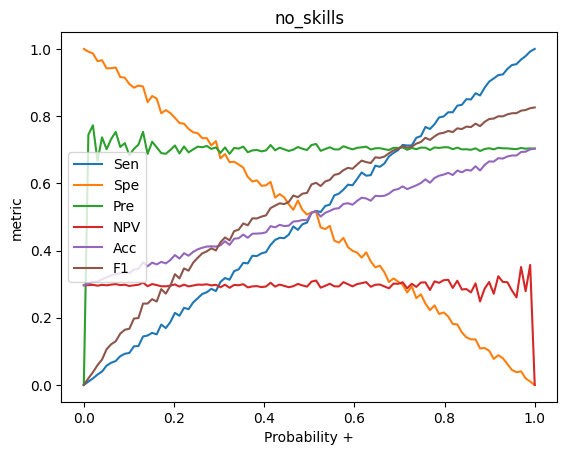

C:\Users\pmoll\AppData\Local\Temp\ipykernel_5608\3396223331.py:7: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP / (TP + FP)
C:\Users\pmoll\AppData\Local\Temp\ipykernel_5608\3396223331.py:7: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP / (TP + FP)
C:\Users\pmoll\AppData\Local\Temp\ipykernel_5608\3396223331.py:7: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP / (TP + FP)
C:\Users\pmoll\AppData\Local\Temp\ipykernel_5608\3396223331.py:7: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP / (TP + FP)


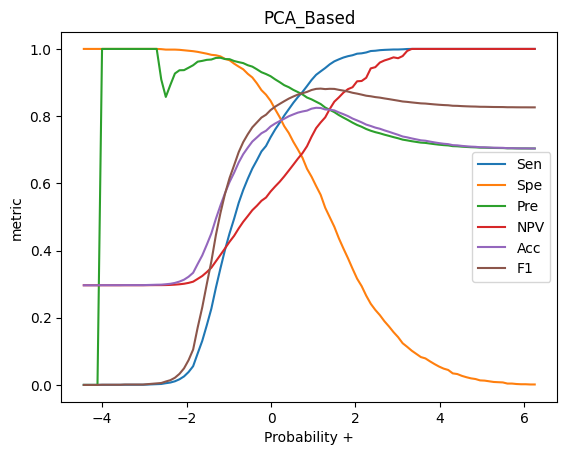

C:\Users\pmoll\AppData\Local\Temp\ipykernel_5608\3396223331.py:8: RuntimeWarning: invalid value encountered in scalar divide
  negative_predictive_value = TN / (TN + FN)
C:\Users\pmoll\AppData\Local\Temp\ipykernel_5608\3396223331.py:7: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP / (TP + FP)


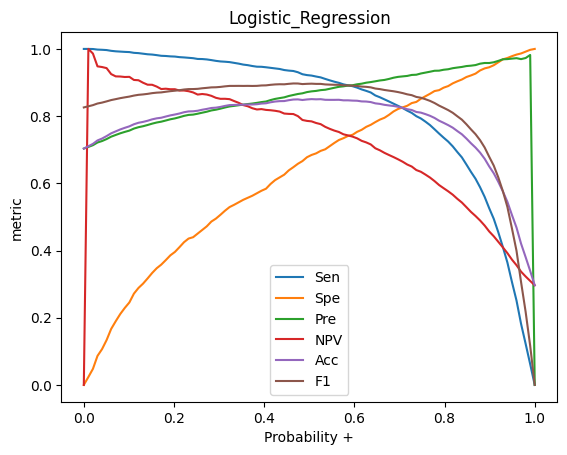

[0.83053739 0.82130816 0.9168236  0.67144432 0.8278     0.87155005]


In [19]:
# Number of parameters
N=100

## No_skills (random)

range_no_skills = np.linspace(0, 1, N)
metrics_no_skills = np.zeros((N,6))

for ith, p in enumerate(range_no_skills):
    y_pred_th = no_skills(X_test, p=p)
    #print(y_pred_th)
    metrics_no_skills[ith] = np.nan_to_num(metrics(y_pred_th, y_test))
    #print(metrics_no_skills[ith])
   
plt.title(titles[0])
plt.plot(range_no_skills,metrics_no_skills[:,0],label='Sen')
plt.plot(range_no_skills,metrics_no_skills[:,1],label='Spe')
plt.plot(range_no_skills,metrics_no_skills[:,2],label='Pre')
plt.plot(range_no_skills,metrics_no_skills[:,3],label='NPV')
plt.plot(range_no_skills,metrics_no_skills[:,4],label='Acc')
plt.plot(range_no_skills,metrics_no_skills[:,5],label='F1')
plt.xlabel('Probability +')
plt.ylabel('metric')
plt.legend()
plt.show()


## PCA_Based


range_PCA = np.linspace(np.min(X_train_pca[:, 0]), np.max(X_train_pca[:, 0]),N)
metrics_PCA =np.zeros((N,6))
for ith,p in enumerate(range_PCA):
    y_pred_PCA = PCA_based(X_test, p)
    metrics_PCA[ith] = np.nan_to_num(metrics(y_pred_PCA, y_test))

plt.title(titles[1])
plt.plot(range_PCA,metrics_PCA[:,0],label='Sen')
plt.plot(range_PCA,metrics_PCA[:,1],label='Spe')
plt.plot(range_PCA,metrics_PCA[:,2],label='Pre')
plt.plot(range_PCA,metrics_PCA[:,3],label='NPV')
plt.plot(range_PCA,metrics_PCA[:,4],label='Acc')
plt.plot(range_PCA,metrics_PCA[:,5],label='F1')
plt.xlabel('Probability +')
plt.ylabel('metric')
plt.legend()
plt.show()


## Logistic Regression

range_log =np.linspace(0, 1,N)
metrics_log = np.zeros((N,6))
for ith,p in enumerate(range_log):
    y_pred_log = (logistic(X_test,X_train,y_train)[:,1]>p).astype(int)
    metrics_log[ith] = np.nan_to_num(metrics(y_pred_log, y_test))
    

plt.title(titles[2])
plt.plot(range_log,metrics_log[:,0],label='Sen')
plt.plot(range_log,metrics_log[:,1],label='Spe')
plt.plot(range_log,metrics_log[:,2],label='Pre')
plt.plot(range_log,metrics_log[:,3],label='NPV')
plt.plot(range_log,metrics_log[:,4],label='Acc')
plt.plot(range_log,metrics_log[:,5],label='F1')
plt.xlabel('Probability +')
plt.ylabel('metric')
plt.legend()
plt.show()

print(metrics_log[69])

range_pca=np.linspace(np.min(X_train_pca[:, 0]), np.max(X_train_pca[:, 0]),N)


## 5. ROC

For each of the predictors, plot the Sensitivity vs. 1-Specificity

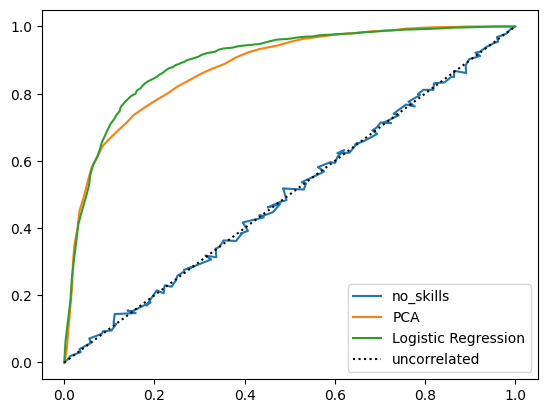

In [20]:
#plt.plot(x, y, label)

# Sensitivity reflects the true positive rate and specificity the true negative rate.

plt.plot(1 - metrics_no_skills[:,1], metrics_no_skills[:,0],label="no_skills")
plt.plot(1 - metrics_PCA[:,1], metrics_PCA[:,0],label=f"PCA")
plt.plot(1 - metrics_log[:,1], metrics_log[:,0],label=f"Logistic Regression")
plt.plot([0,1],[0,1],':',color='black', label='uncorrelated')
plt.legend()
plt.show()

One can characterize the performance using the AUC (the area under the curve)


In [21]:
from sklearn.metrics import auc

pca_auc = auc(metrics_PCA[:,1], metrics_PCA[:,0])
log_auc = auc(metrics_log[:,1], metrics_log[:,0])

print("PCA AUC:", pca_auc)
print("log AUC:", log_auc)

PCA AUC: 0.8755081521963162
log AUC: 0.8957105752216716


## 6. Best parameters 

We can decide which is the best parameter by looking for the value for which we get quality values nearer to the perfect prediction, i.e. we can try to minimize 

$$dis=\sqrt{(Sen-1)^2+(1-Spe)^2)}$$

or maximize the distance to the uncorrelated threshold, the so-called Youden's index
$$Youden=Sen-(1-Spe)=Sen+Spe-1$$



In [22]:
import math

" METHOD 1: LISTS "
"""
" Minimize distance "
def dis(sensitivity, specificity):
    return math.sqrt((sensitivity-1)**2+(1-specificity)**2)

def minimize(sensitivity, specificity):
    dis_list = [dis(x,y) for x,y in zip(sensitivity, specificity)]
    min_value = min(dis_list)
    return (sensitivity[dis_list.index(min_value)], specificity[dis_list.index(min_value)], min_value)

print("(Value Sensitivity, Value Specificity, Min value):", minimize(Sen, Spe), "\n")


" Maximize Youden's Index "
def youden(sensitivity, specificity):
    return sensitivity + specificity - 1

def maximize(sensitivity, specificity):
    youden_list = [youden(x,y) for x,y in zip(sensitivity, specificity)]
    max_value = max(youden_list)
    return (sensitivity[youden_list.index(max_value)], specificity[youden_list.index(max_value)], max_value)
    
print("(Value Sensitivity, Value Specificity, Max value):", maximize(Sen, Spe))
"""

" METHOD 2: NUMPY ARRAYS "
Sen_log = metrics_log[:,0]
#print("Sensitivity:\n", Sen)

Spe_log = metrics_log[:,1]
#print("Specificity:\n", Spe)

dis_value_log = np.sqrt((Sen_log-1.0)**2.0+(1.0-Spe_log)**2.0)
Youden_index_log = Sen_log+Spe_log-1

# Position of the minimum value
dis_min_log = np.argmin(dis_value_log)
print("***************************************")
print("\n   MINIMIZING DIS VALUE FOR LOGISTIC REGRESSION \n")
print("Position:", dis_min_log)
print("Value Sensitivity:", Sen_log[dis_min_log])
print("Value Specificity:", Spe_log[dis_min_log])
print("Value min:", dis_value_log[dis_min_log], "\n")
print("***************************************\n")


# Position of the maximum value
youden_max_log = np.argmax(Youden_index_log)
print("***************************************")
print("\n   MAXIMIZING YOUDEN'S INDEX FOR LOGISTIC REGRESSION \n")
print("Position:", youden_max_log)
print("Value Sensitivity:", Sen_log[youden_max_log])
print("Value Specificity:", Spe_log[youden_max_log])
print("Value max:", Youden_index_log[youden_max_log], "\n")
print("***************************************\n")



" METHOD 2: NUMPY ARRAYS "
Sen_PCA = metrics_PCA[:,0]
#print("Sensitivity:\n", Sen_PCA, "\n")

Spe_PCA = metrics_PCA[:,1]
#print("Specificity:\n", Spe_PCA, "\n")

dis_value_PCA = np.sqrt((Sen_PCA-1.0)**2.0+(1.0-Spe_PCA)**2.0)
Youden_index_PCA = Sen_PCA + Spe_PCA-1

# Position of the minimum value
dis_min_PCA = np.argmin(dis_value_PCA)
print("***************************************")
print("\n   MINIMIZING DIS VALUE FOR PCA \n")
print("Position:", dis_min_PCA)
print("Value Sensitivity:", Sen_PCA[dis_min_PCA])
print("Value Specificity:", Spe_PCA[dis_min_PCA])
print("Value min:", dis_value_PCA[dis_min_PCA], "\n")
print("***************************************\n")


# Position of the maximum value
youden_max_PCA = np.argmax(Youden_index_PCA)
print("***************************************")
print("\n   MAXIMIZING YOUDEN'S INDEX FOR PCA \n")
print("Position:", youden_max_PCA)
print("Value Sensitivity:", Sen_PCA[youden_max_PCA])
print("Value Specificity:", Spe_PCA[youden_max_PCA])
print("Value max:", Youden_index_PCA[youden_max_PCA], "\n")
print("***************************************\n")

***************************************

   MINIMIZING DIS VALUE FOR LOGISTIC REGRESSION 

Position: 69
Value Sensitivity: 0.8305373898208701
Value Specificity: 0.8213081591368847
Value min: 0.24626885763281695 

***************************************

***************************************

   MAXIMIZING YOUDEN'S INDEX FOR LOGISTIC REGRESSION 

Position: 69
Value Sensitivity: 0.8305373898208701
Value Specificity: 0.8213081591368847
Value max: 0.6518455489577548 

***************************************

***************************************

   MINIMIZING DIS VALUE FOR PCA 

Position: 43
Value Sensitivity: 0.7802104065965312
Value Specificity: 0.7970330411328388
Value min: 0.299170606444293 

***************************************

***************************************

   MAXIMIZING YOUDEN'S INDEX FOR PCA 

Position: 41
Value Sensitivity: 0.7369917543360819
Value Specificity: 0.8455832771409305
Value max: 0.5825750314770124 

***************************************



Extract the best parameters for the PCA and the Logistic regression and compare the quality metrics using these parameters with those discussed above

In [23]:
# The best parameter p for the PCA & Logistic Regression predictor 
print(" ---------- Quality metrics Logistic Regression ---------- ", "\n")
best_parameter_log = ("Youden's Index Position:", youden_max_log, "Distance's Position:", dis_min_log)
best_results = metrics_log[youden_max_log]
print(" Best parameter Logistic Regression:", best_parameter_log, "\n")
metrics = [" Sensitivity", " Specificity", " Precision", " Accuracy", " NPV", " F1-Score"]
for position, metric in enumerate(metrics):
    print(metric, ":", best_results[position])
print("\n", "-------------------------------", "\n")

print("Youden Index PCA:", Youden_index_PCA, "\n")

print("Distance value:", dis_value_PCA, "\n")

print(" ---------- Quality metrics PCA ---------- ", "\n")
best_parameter_PCA = ("Youden's Index Position:", youden_max_PCA, "Distance's Position:", dis_min_PCA)
best_results_PCA = metrics_PCA[youden_max_PCA]
print(" Best parameter PCA:", best_parameter_PCA, "\n")
for position, metric in enumerate(metrics):
    print(metric, ":", best_results_PCA[position])
print("\n", "-------------------------------", "\n")

 ---------- Quality metrics Logistic Regression ----------  

 Best parameter Logistic Regression: ("Youden's Index Position:", 69, "Distance's Position:", 69) 

 Sensitivity : 0.8305373898208701
 Specificity : 0.8213081591368847
 Precision : 0.9168236032642813
 Accuracy : 0.6714443219404631
 NPV : 0.8278
 F1-Score : 0.8715500522154259

 ------------------------------- 

Youden Index PCA: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.84333239e-04 2.84333239e-04 2.84333239e-04 2.84333239e-04
 2.84333239e-04 5.68666477e-04 5.68666477e-04 5.68666477e-04
 5.68666477e-04 5.68666477e-04 1.13733295e-03 1.70599943e-03
 2.27466591e-03 2.16902355e-03 3.09507179e-03 5.08540446e-03
 8.78173656e-03 1.40784257e-02 2.12598052e-02 3.29905165e-02
 4.89862264e-02 8.50639539e-02 1.19614373e-01 1.63547789e-01
 2.09365895e-01 2.70570590e-01 3.24918693e-01 3.72661944e-01
 4.17521408e-01 4.50909761e-01 4.89058730e-01 5.19636345e-01
 5.39417157e-01 5.59051872e-01 5.66256834e-01 5.72186227e-0